In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
# Leitura do Arquivo CSV
csv_x = pd.read_csv('/gdrive/My Drive/Colab Notebooks/X.csv', sep=',', header=None) # Conjuntos de dados para o classificador.
csv_y = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Y.csv', sep=',',  header=None) # O rótulo para a previsão do resultado em relação aos frames.

In [4]:
# Remoção do cabeçalho do CSV, para tratar colunas como matrizes e ter um melhor uso dos arquivos. 
new_header = csv_x.iloc[0]
csv_x = csv_x[1:]
csv_x.columns = new_header

new_header = csv_y.iloc[0]
csv_y = csv_y[1:]
csv_y.columns = new_header

In [5]:
# Demonstração de estatisticas descritivas dentro do DataSet.
for columns in csv_x.columns:
    # print("Coluna '"+columns+"':\n%s " % csv_x[columns].astype(float).describe())
    print("Column '" + columns + "':\n")
    print("Mean: %0.2f" % csv_x[columns].astype(float).mean())
    print("Maximum: %0.f" % csv_x[columns].astype(float).max())
    print("Minimum: %0.f" % csv_x[columns].astype(float).min())
    print("25 Percentil %0.2f" % csv_x[columns].astype(float).quantile(.25))
    print("90 Percentil %0.2f" % csv_x[columns].astype(float).quantile(.90))
    print("Standard Deviation: %0.2f" % csv_x[columns].astype(float).std())
    print("\n")

Column 'TimeStamp':

Mean: 1409266578.50
Maximum: 1409268378
Minimum: 1409264779
25 Percentil 1409265678.75
90 Percentil 1409268018.10
Standard Deviation: 1039.37


Column 'all_..idle':

Mean: 9.06
Maximum: 70
Minimum: 0
25 Percentil 0.00
90 Percentil 38.62
Standard Deviation: 16.12


Column 'X..memused':

Mean: 89.14
Maximum: 98
Minimum: 73
25 Percentil 82.97
90 Percentil 96.77
Standard Deviation: 8.18


Column 'proc.s':

Mean: 7.68
Maximum: 48
Minimum: 0
25 Percentil 0.00
90 Percentil 20.00
Standard Deviation: 8.53


Column 'cswch.s':

Mean: 54045.87
Maximum: 83880
Minimum: 11398
25 Percentil 31302.00
90 Percentil 72135.10
Standard Deviation: 19497.81


Column 'file.nr':

Mean: 2656.33
Maximum: 2976
Minimum: 2304
25 Percentil 2496.00
90 Percentil 2880.00
Standard Deviation: 196.11


Column 'sum_intr.s':

Mean: 19978.04
Maximum: 35536
Minimum: 10393
25 Percentil 16678.00
90 Percentil 28228.40
Standard Deviation: 4797.27


Column 'ldavg.1':

Mean: 75.88
Maximum: 147
Minimum: 11
25 Perc

In [6]:
print("Number of Observations with memory usage (X_memused) larger than 80%%: %.d" % csv_x[csv_x['X..memused'].astype(float) > 80]['X..memused'].count())

Number of Observations with memory usage (X_memused) larger than 80%: 2875


In [7]:
print("The minimum memory utilization for observations with CPU idle time lower than 20%%: %0.2f (X..memused)" %csv_x[csv_x['all_..idle'].astype(float) < 20]['X..memused'].astype(float).min())

The minimum memory utilization for observations with CPU idle time lower than 20%: 73.03 (X..memused)


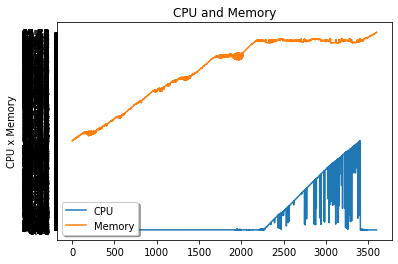

<Figure size 432x288 with 0 Axes>

In [8]:
# Demonstração gráfica do DataSet
import matplotlib.pyplot as plt

cpu = np.array(csv_x['all_..idle'])
memory = np.array(csv_x['X..memused'])

plt.plot(cpu, label='CPU')
plt.plot(memory, label='Memory')
legend = plt.legend(loc='lower left', shadow=True)
plt.title("CPU and Memory")
plt.ylabel('CPU x Memory')
plt.show()

plt.clf()

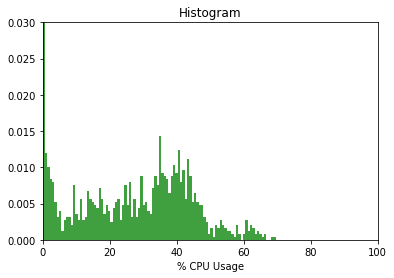

<Figure size 432x288 with 0 Axes>

In [9]:
# Histograma para utilização da CPU
plt.hist(cpu.astype(float), 100, density=True, facecolor='green', alpha=0.75)
plt.axis([0, 100, 0, 0.03])
plt.xlabel('% CPU Usage')
plt.title("Histogram")
plt.show()

plt.clf()

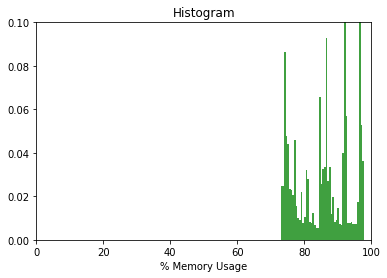

<Figure size 432x288 with 0 Axes>

In [10]:
# Histograma da utilização de memória
plt.hist(memory.astype(float), 50, density=True, facecolor='green', alpha=0.75)
plt.axis([0, 100, 0, 0.10])
plt.xlabel('% Memory Usage')
plt.title("Histogram")
plt.show()

plt.clf()

In [11]:
# Configuração preliminar: Transformar os dados da coluna CSV (Númericos) para float. 
for columns in csv_x.columns:
    csv_x[columns] = csv_x[columns].astype(float)

for columns in csv_y.columns:
    csv_y[columns] = csv_y[columns].astype(float)

In [12]:
# Carregar os calores para dentro do DataFrame(Algoritmos Atuam)
# Transforma o arquivo em DataFrame
csv_x = pd.DataFrame(csv_x)
csv_y = pd.DataFrame(csv_y)

In [13]:
# Separação do modelo de Aprendizado.
# 70% Destinado ao Treino      #30% Destinado ao teste
x_train, x_test, y_train, y_test = train_test_split(csv_x, csv_y, test_size=0.30)

In [14]:
# Setar novamente a configuração do DataFrame para não perder a dimensão.
x_train = pd.DataFrame(x_train, columns=['TimeStamp','all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s'])
x_test = pd.DataFrame(x_test, columns=['TimeStamp','all_..idle','X..memused','proc.s','cswch.s','file.nr','sum_intr.s','ldavg.1','tcpsck','pgfree.s'])
y_train = pd.DataFrame(y_train, columns=['TimeStamp','DispFrames'])
y_test = pd.DataFrame(y_test, columns=['TimeStamp','DispFrames'])

x_train_bkp = x_train
x_test_bkp = x_test
y_train_bkp = y_train
y_test_bkp = y_test

In [15]:
# Classificação utilizando o Regressor Linear. 
regr = linear_model.LinearRegression()
regr.fit(x_train.iloc[:, x_train.columns != "TimeStamp"], y_train.iloc[:, y_train.columns != "TimeStamp"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
# Predição.
y_pred = regr.predict(x_test.iloc[:, x_test.columns != "TimeStamp"])
print(y_pred)

[[24.05099463]
 [14.46072479]
 [12.78561903]
 ...
 [23.31681405]
 [17.63975585]
 [20.49580078]]


In [17]:
# Exibir coeficientes de regressão.
print("Coefficients: ")
print(regr.coef_)

Coefficients: 
[[-9.41760085e-02 -8.16542627e-02 -9.85459667e-03 -9.63055830e-05
  -3.06952243e-03  1.41369001e-05 -6.50964374e-02 -5.64570790e-02
  -1.94965058e-05]]


In [18]:
# Performance de classificação
# Usa-se acurracia quando há equilibrio entre as classes
accuracy = regr.score(x_test.iloc[:, x_test.columns != "TimeStamp"], y_test.iloc[:, y_test.columns != "TimeStamp"])
print(accuracy*100,'%')

72.01796155901454 %


In [19]:
# Utilizando KNN, para classificação. Usado para teste de classificação.
import sklearn
knn = KNeighborsClassifier(n_neighbors=5) #knn = KNeighborsClassifier(n_neighbors=3)
y_train = np.ravel(y_train.iloc[:, y_train.columns != "TimeStamp"])
y_train = y_train.astype(int)

y_test = y_test.iloc[:, y_test.columns != "TimeStamp"]
y_test = y_test.astype(int)

# Treinando KNN
knn.fit(x_train.iloc[:, x_train.columns != "TimeStamp"], y_train)
y_pred = knn.predict(x_test.iloc[:, x_test.columns != "TimeStamp"])

In [20]:
# Quanto o KNN foi bom ? Imprimindo a acurácia.
print("KNN: Accuracy of the Classifier C = %.3f " % (sklearn.metrics.accuracy_score(y_test, y_pred)*100))

KNN: Accuracy of the Classifier C = 50.370 


In [21]:
# Classificação com árvore de decisão.
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train.iloc[:, x_train.columns != "TimeStamp"], y_train)
y_pred = clf.predict(x_test.iloc[:, x_train.columns != "TimeStamp"])
score = accuracy_score(y_test, y_pred)

print("Decision Tree Classification Performance: "+str(score*100))

Decision Tree Classification Performance: 46.85185185185185


TAREFA: O cursista deverá entregar um arquivo Google Colaboratory contendo a implementação dos classificadores apresentados pelos ministrantes e propor ao final (de forma textual) melhorias para os algoritmos (apresentados pelos ministrantes) com objetivo de aprimorar a performance da classificação.


R: Como alternativa para a melhora de perfomance do algoritmo creio que seria viável, a diminuição das bibliotecas utilizadas assim como o número de atributos dedicados ao algoritmo. Além disso, poderia acrescentar porcentagem de treino para cerca de 80% e a diminuição da porcentagem de teste para 20%, tais como possível melhoria. 